<a href="https://colab.research.google.com/github/gabrielddrs/loja-varejista/blob/main/Lojas_de_roupas_varejistas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Carregando o conjunto da Dados
df = pd.read_csv('Cadastro_clientes.csv').set_index('ID')

df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


<Axes: >

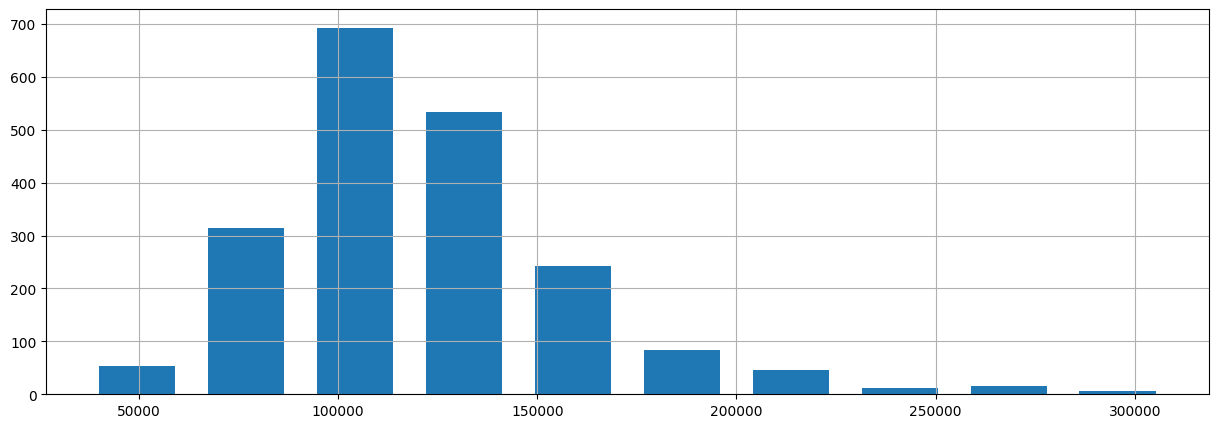

In [3]:
#Plotando o gráfico de renda anual
plt.figure(figsize=(15, 5))
df['Income'].hist(bins=10, rwidth=0.70)

In [4]:
#Pessoas com rendas anuais abaixo de 60k
(df['Income'] < 60_000).sum() 

36

<Axes: >

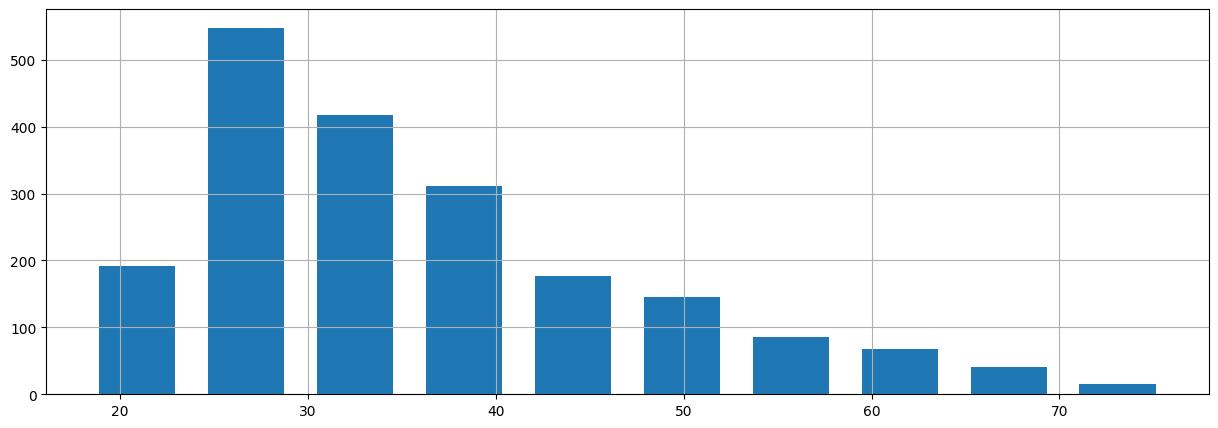

In [5]:
#Plotando o gráfico de idade
plt.figure(figsize=(15,5))
df['Age'].hist(bins=10,rwidth=0.70)

In [6]:
#Média de idade dos clientes da loja
df['Age'].mean()

35.909

<Axes: >

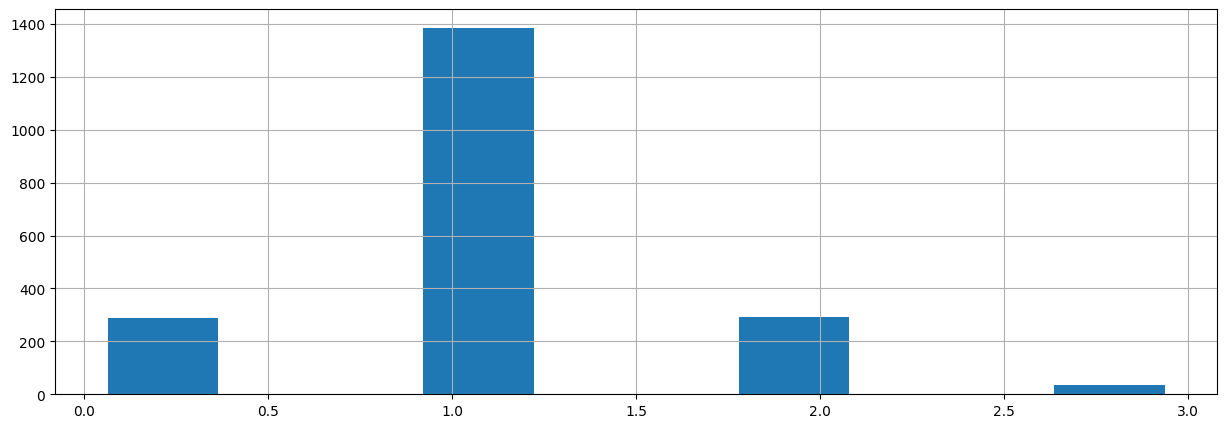

In [7]:
#Plotando o nível educacional dos clientes
plt.figure(figsize=(15,5))
df['Education'].hist(bins=7, rwidth=0.70)

In [8]:
#Pessoas que terminaram o ensino médio
(df['Education'] >= 2).sum()

327

In [9]:
#Pessoas que não terminaram o ensino média
(df['Education'] < 2).sum()

1673

In [10]:
#Declarando variáveis
X = df.drop('Income', axis=1)
y = df['Income']

In [11]:
#Importando a biblioteca de treinamento
from sklearn.model_selection import train_test_split

#Separando as variáveis em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=61658)

In [23]:
#Importando o modelo
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#Parâmetros de treinamento
params = {
    'max_leaf_nodes': [3, 4, 5, 6, 7, 8], #Máximo de grupos que será testado
    'min_samples_leaf': [5, 10, 20], #Minímo de amostras por grupos
}

#Dividindo o arquivo de treino em várias partes
model = GridSearchCV(
    DecisionTreeRegressor(random_state=61658),
    params,
    cv=10, #Números de partes que serão divididas
    scoring='neg_mean_squared_error', #Negar a média do erro quadrático(Minimizar o erro quadrático)
    verbose=10,
    n_jobs=1, #Número de nucleos de processador usados
)
#Neste caso, iremos separar em 10 partes
#Sendo das 10, ele pega 9 para treinar e a que sobra para aplicar o padrão
#Com isso, treinaremos 180 modelos

#Criando o modelo

model.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10; 1/18] START max_leaf_nodes=3, min_samples_leaf=5......................
[CV 1/10; 1/18] END max_leaf_nodes=3, min_samples_leaf=5;, score=-685928494.157 total time=   0.0s
[CV 2/10; 1/18] START max_leaf_nodes=3, min_samples_leaf=5......................
[CV 2/10; 1/18] END max_leaf_nodes=3, min_samples_leaf=5;, score=-940029058.768 total time=   0.0s
[CV 3/10; 1/18] START max_leaf_nodes=3, min_samples_leaf=5......................
[CV 3/10; 1/18] END max_leaf_nodes=3, min_samples_leaf=5;, score=-736927525.502 total time=   0.0s
[CV 4/10; 1/18] START max_leaf_nodes=3, min_samples_leaf=5......................
[CV 4/10; 1/18] END max_leaf_nodes=3, min_samples_leaf=5;, score=-938303116.828 total time=   0.0s
[CV 5/10; 1/18] START max_leaf_nodes=3, min_samples_leaf=5......................
[CV 5/10; 1/18] END max_leaf_nodes=3, min_samples_leaf=5;, score=-907347576.892 total time=   0.0s
[CV 6/10; 1/18] START max_leaf_nodes=

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=61658),
             n_jobs=1,
             param_grid={'max_leaf_nodes': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [5, 10, 20]},
             scoring='neg_mean_squared_error', verbose=10)

In [13]:
#Melhores parâmetros encontrados

model.best_params_

{'max_leaf_nodes': 7, 'min_samples_leaf': 5}

In [14]:
#Erro médio da renda anual

(model.best_score_*(-1))**0.50

26013.53656864448

In [15]:
#Erro médio no conjunto de testes
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, model.predict(X_test))**0.50

24005.485323008284

In [16]:
#Previsão do conjunto de testes

model.predict(X_test)

array([ 84961.81081081, 103104.62      , 140458.90588235, 103104.62      ,
       162645.16666667, 120248.79080824,  84961.81081081, 162645.16666667,
       162645.16666667, 103104.62      , 103104.62      , 120248.79080824,
       140458.90588235, 120248.79080824, 120248.79080824, 120248.79080824,
       162645.16666667, 120248.79080824, 140458.90588235, 120248.79080824,
       122794.47368421, 120248.79080824, 120248.79080824, 120248.79080824,
       140458.90588235,  84961.81081081, 120248.79080824,  84961.81081081,
       120248.79080824, 103104.62      , 103104.62      , 162645.16666667,
       140458.90588235, 120248.79080824, 140458.90588235, 206019.59677419,
       120248.79080824, 120248.79080824, 140458.90588235, 120248.79080824,
       140458.90588235, 120248.79080824,  84961.81081081,  84961.81081081,
        84961.81081081, 140458.90588235,  84961.81081081, 120248.79080824,
       120248.79080824, 122794.47368421, 120248.79080824, 162645.16666667,
        84961.81081081, 2

(array([ 12., 110., 172.,  59.,  28.,  13.,   2.,   3.,   0.,   1.]),
 array([-54472.62      , -34440.77466667, -14408.92933333,   5622.916     ,
         25654.76133333,  45686.60666667,  65718.452     ,  85750.29733333,
        105782.14266667, 125813.988     , 145845.83333333]),
 <BarContainer object of 10 artists>)

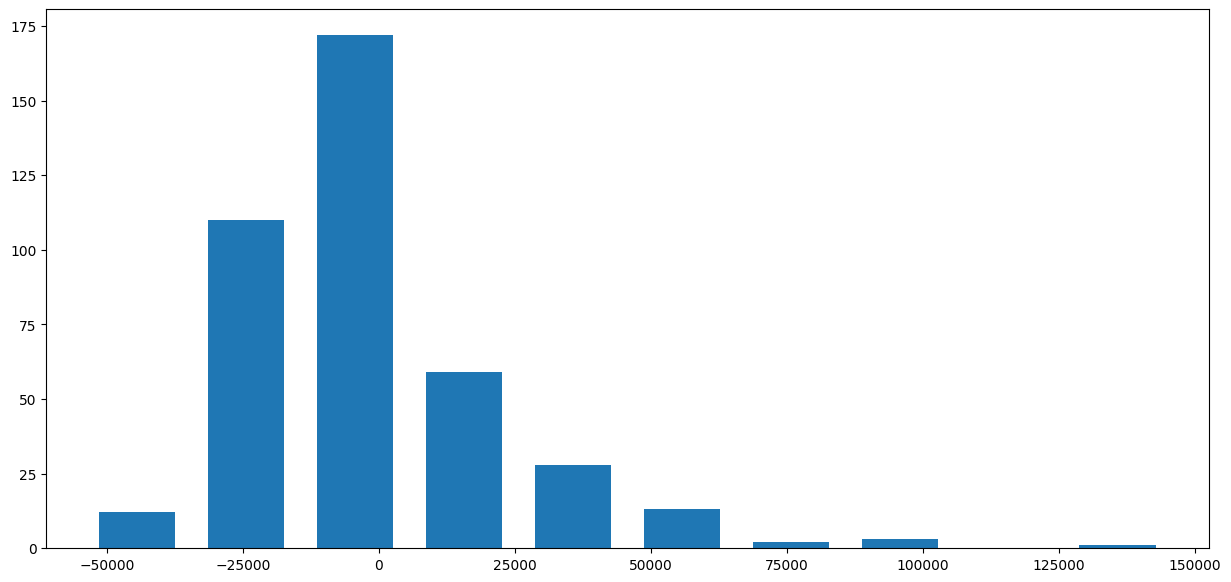

In [20]:
#Plotando um histograma do erro
plt.figure(figsize=(15,7))

plt.hist(y_test - model.predict(X_test), bins=10, rwidth=0.70)
#Do lado direito subestimando e lado esquerdo superestimou

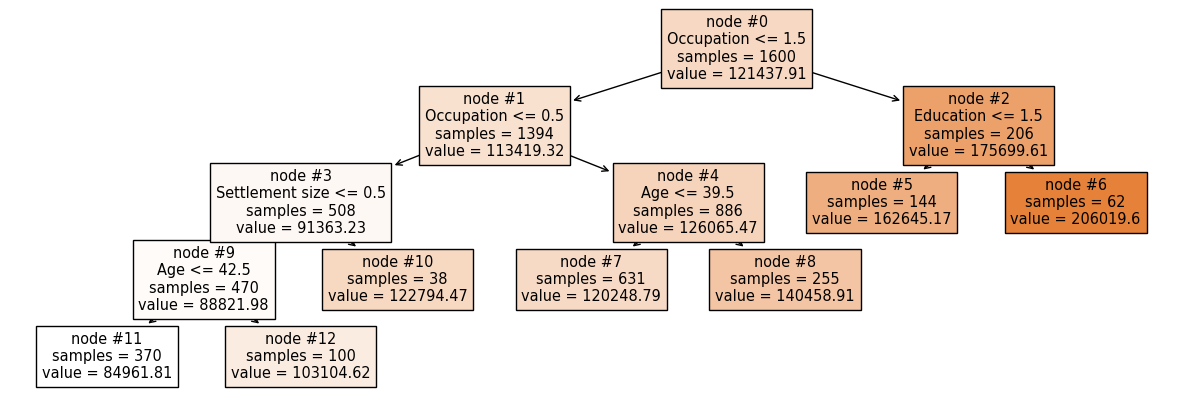

In [22]:
#Plotando o modelo
from sklearn.tree import plot_tree

plt.figure(figsize=(15,5))
plot_tree(model.best_estimator_,
          feature_names = X_train.columns, #Retorna os nomes das colunas
          filled = True, #Intensifica a cor conforme quanto maior a previsão de venda
          node_ids = True, #Coloca um Id em cada nó
          impurity = False, #Omite o erro quadrático
          precision = 2 #Número de casas decimais
);